# Principal Component Analysis with Cancer Data

In [14]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
#Loading the data file into DataFrame
df=pd.read_csv("breast-cancer-wisconsin-data.csv")
#Display top 10 rows
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
#Printing the datatypes
print("**** Data Types ****")
print(df.dtypes)
#Printing the shape
print("*** Shape ****")
print(df.shape)
print("**** Description ****")
print(df.describe())

**** Data Types ****
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object
*** Shape ****
(699, 11)
**** Description ****
                 ID  ClumpThickness   Cell Size  Cell Shape  \
count  6.990000e+02      699.000000  699.000000  699.000000   
mean   1.071704e+06        4.417740    3.134478    3.207439   
std    6.170957e+05        2.815741    3.051459    2.971913   
min    6.163400e+04        1.000000    1.000000    1.000000   
25%    8.706885e+05        2.000000    1.000000    1.000000   
50%    1.171710e+06        4.000000    1.000000    1.000000   
75%    1.238298e+06        6.000000    5.000000    5.000000

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [5]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
# No missing values found. So let us try to remove ? from bare nuclei column
df_question=df.loc[df['Bare Nuclei'] == "?"]
print(df_question)
# Get count of rows having ?
print("**** Count ****")
print(df_question['Bare Nuclei'].count())

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
23   1057013               8          4           5                  1   
40   1096800               6          6           6                  9   
139  1183246               1          1           1                  1   
145  1184840               1          1           3                  1   
158  1193683               1          1           2                  1   
164  1197510               5          1           1                  1   
235  1241232               3          1           4                  1   
249   169356               3          1           1                  1   
275   432809               3          1           3                  1   
292   563649               8          8           8                  1   
294   606140               1          1           1                  1   
297    61634               5          4           3                  1   
315   704168               4          

In [7]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
df=df.replace('?',np.nan)
df.fillna(df['Bare Nuclei'].median(),inplace=True)
print(df)
print("Checking for question mark")
df_question=df.loc[df['Bare Nuclei'] == "?"]

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1   
1    1002945               5          4           4                  5   
2    1015425               3          1           1                  1   
3    1016277               6          8           8                  1   
4    1017023               4          1           1                  3   
5    1017122               8         10          10                  8   
6    1018099               1          1           1                  1   
7    1018561               2          1           2                  1   
8    1033078               2          1           1                  1   
9    1033078               4          2           1                  1   
10   1035283               1          1           1                  1   
11   1036172               2          1           1                  1   
12   1041801               5          

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [8]:
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [9]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int32
ClumpThickness                 699 non-null int32
Cell Size                      699 non-null int32
Cell Shape                     699 non-null int32
Marginal Adhesion              699 non-null int32
Single Epithelial Cell Size    699 non-null int32
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int32
Bland Chromatin                699 non-null int32
Mitoses                        699 non-null int32
Class                          699 non-null int32
dtypes: int32(11)
memory usage: 30.1 KB


C:\Users\anupama.pushparaju\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


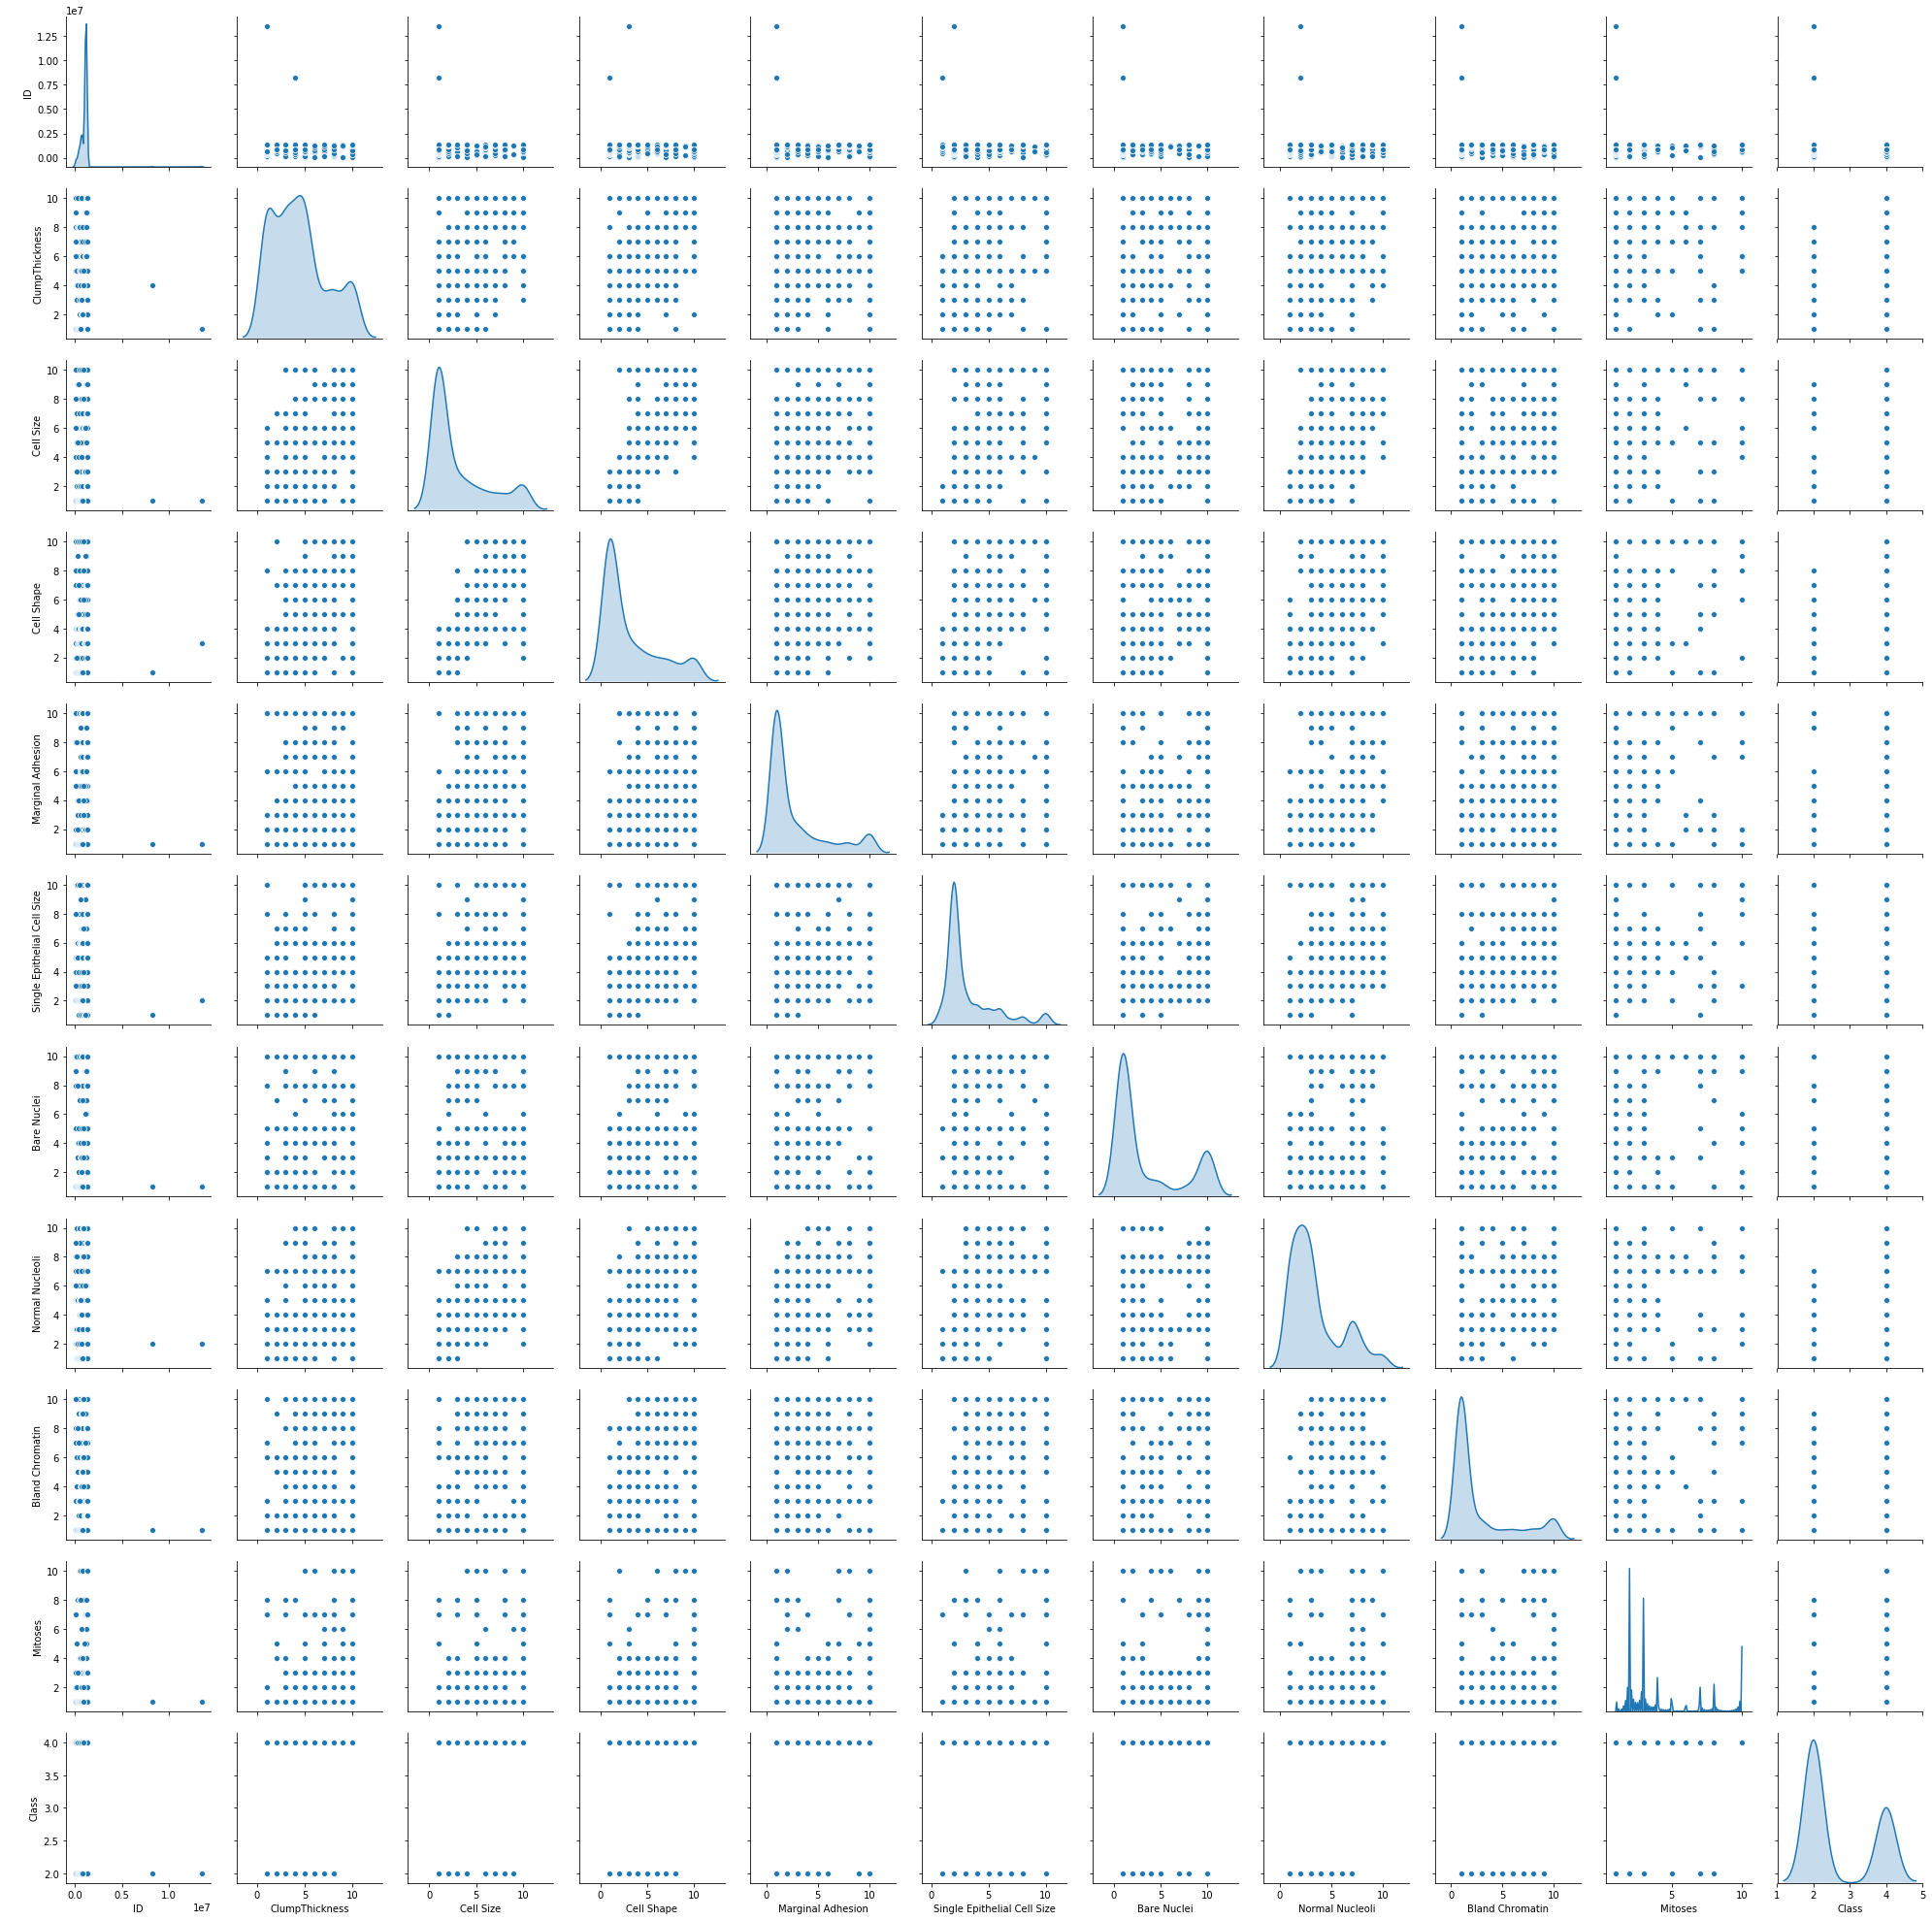

In [10]:
#Let us check for pair plots
df=df.astype(int)
df.info()
sns.pairplot(df,diag_kind='kde')


In [11]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [12]:
# We could see most of the outliers are now removed.
#Create a copy.
df_original=df.copy()
#Dropping the ID an Class columns
df.drop(['ID','Class'],axis=1,inplace=True)


In [13]:
df=df.apply(zscore)
df.head(5)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


In [14]:
#Removing the outliers
df_out=df[~((df>3).any(axis=1) | (df<-3).any(axis=1))]
df_out.shape
print("There are "+str((df.count()-df_out.count())[1])+" outliers")

There are 51 outliers


# Q6 Create a covariance matrix for identifying Principal components

In [15]:
# PCA
# Step 1 - Create covariance matrix
cMatrix=np.cov(df_out.T)
print('Covariance Matrix \n%s',cMatrix)

Covariance Matrix 
%s [[0.91401218 0.53643317 0.54093429 0.42021938 0.34537022 0.52829327
  0.48866718 0.46377525 0.15402709]
 [0.53643317 0.82638955 0.74244669 0.57702405 0.48867728 0.5893472
  0.63285152 0.62168083 0.17330135]
 [0.54093429 0.74244669 0.82445472 0.55821692 0.47067544 0.60019541
  0.6186398  0.61428593 0.15627696]
 [0.42021938 0.57702405 0.55821692 0.84193637 0.40233268 0.60312063
  0.5569131  0.50974886 0.15706924]
 [0.34537022 0.48867728 0.47067544 0.40233268 0.53938103 0.41823925
  0.42921244 0.45933402 0.13212159]
 [0.52829327 0.5893472  0.60019541 0.60312063 0.41823925 0.92157039
  0.58994809 0.50416682 0.1756148 ]
 [0.48866718 0.63285152 0.6186398  0.5569131  0.42921244 0.58994809
  0.87186464 0.58320376 0.13556324]
 [0.46377525 0.62168083 0.61428593 0.50974886 0.45933402 0.50416682
  0.58320376 0.87805322 0.16436097]
 [0.15402709 0.17330135 0.15627696 0.15706924 0.13212159 0.1756148
  0.13556324 0.16436097 0.19574509]]


# Q7 Identify eigen values and eigen vector

In [16]:
# Step 2- Get eigen values and eigen vector
eig_vals,eig_vecs=np.linalg.eig(cMatrix)
print('Eigen Vector \n%s',eig_vecs)
print('Eigen Value \n%s',eig_vals)

Eigen Vector 
%s [[-3.23948900e-01  8.90480135e-01 -1.38421071e-01  8.61931772e-03
   7.41876130e-02 -8.75410024e-02  6.24895631e-02 -1.49153210e-01
   2.08683249e-01]
 [-3.87205711e-01 -8.59552319e-02 -1.84604224e-01  7.22376424e-01
  -1.49865810e-01  1.72134840e-01  1.47810146e-03 -2.30348042e-01
  -4.26174200e-01]
 [-3.83654255e-01 -4.61224321e-02 -1.75795284e-01 -6.61489088e-01
   6.57641250e-02  3.43261785e-01 -1.54681203e-02 -1.66470751e-01
  -4.81772759e-01]
 [-3.43773268e-01 -2.55952028e-01  4.99754921e-01 -3.95394023e-02
   6.69311092e-02 -5.51851447e-04  3.24174268e-01 -5.67798958e-01
   3.64726560e-01]
 [-2.70209925e-01 -1.64168112e-01 -1.50305504e-01 -6.02660806e-02
   2.40488255e-01 -8.35922301e-01  2.18816936e-01  1.09896505e-01
  -2.39275772e-01]
 [-3.66808102e-01  1.11414134e-01  6.26028590e-01  7.26580284e-02
   8.97698733e-02  1.37041998e-01  1.45691088e-02  6.35726562e-01
  -1.56997015e-01]
 [-3.67761777e-01 -1.49726215e-01 -1.17653893e-03 -5.06853019e-02
  -1.304315

# Q8 Find variance and cumulative variance by each eigen vector

In [17]:
#Calculate variance from Eigen Values
total=sum(eig_vals)
variance=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
print("Variance ",variance)

Variance  [68.10589173097411, 7.363692975879657, 6.52694873695691, 4.1941715519026035, 3.8758885066913535, 3.809531493557701, 2.867096006791802, 2.1016369324471764, 1.1551420647986896]


In [18]:
#Calculate Cumulative Variance
cVariance=np.cumsum(variance)
print("Cumulative variance ",cVariance)

Cumulative variance  [ 68.10589173  75.46958471  81.99653344  86.190705    90.0665935
  93.876125    96.743221    98.84485794 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [19]:
#Finding the Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df_out)
print(df_out.dtypes)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5','principal component 6','principal component 7'])
print(principalDf)

ClumpThickness                 float64
Cell Size                      float64
Cell Shape                     float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Normal Nucleoli                float64
Bland Chromatin                float64
Mitoses                        float64
dtype: object
     principal component 1  principal component 2  principal component 3  \
0                -1.119088              -0.618990               0.153865   
1                 1.770913               0.051193              -1.240357   
2                -1.248004              -0.016819              -0.117493   
3                 1.916570              -0.129812               1.575628   
4                -0.993257              -0.123108              -0.245625   
5                 5.504674               0.433356              -0.075743   
6                -0.667493               0.369871              -1.599625   
7                -1.335297 

# Q10 Find correlation between components and features

In [23]:
#print(pca.components_)
correlation_df=pd.DataFrame(pca.components_,columns=["ClumpThickness",
"Cell Size",
"Cell Shape",
"Marginal Adhesion",
"Single Epithelial Cell Size",
"Bare Nuclei",
"Normal Nucleoli",
"Bland Chromatin",
"Mitoses"])
correlation_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.132215,0.095950,-0.152286,0.205397,0.023441,0.176008,0.047712,0.265313
Cell Size,0.132215,1.000000,0.966816,0.269775,-0.147642,-0.105888,-0.192519,-0.085628,-0.151122
Cell Shape,0.095950,0.966816,1.000000,0.105546,-0.340372,0.027329,-0.211348,-0.039314,-0.239692
Marginal Adhesion,-0.152286,0.269775,0.105546,1.000000,0.343903,0.046917,0.273888,0.082950,0.246460
Single Epithelial Cell Size,0.205397,-0.147642,-0.340372,0.343903,1.000000,-0.101223,-0.371209,-0.159968,0.816319
Bare Nuclei,0.023441,-0.105888,0.027329,0.046917,-0.101223,1.000000,-0.038371,-0.027938,0.299479
Normal Nucleoli,0.176008,-0.192519,-0.211348,0.273888,-0.371209,-0.038371,1.000000,-0.084266,-0.529806
Bland Chromatin,0.047712,-0.085628,-0.039314,0.082950,-0.159968,-0.027938,-0.084266,1.000000,0.237762
Mitoses,0.265313,-0.151122,-0.239692,0.246460,0.816319,0.299479,-0.529806,0.237762,1.000000


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [4]:
jokes=pd.read_csv("jokes.csv")
jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [8]:
ratings=jokes.iloc[1:199,1:]
print(ratings)

     Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  \
1     4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88    9.22   
2    99.00  99.00  99.00  99.00   9.03   9.27   9.03   9.27  99.00   99.00   
3    99.00   8.35  99.00  99.00   1.80   8.16  -2.82   6.21  99.00    1.84   
4     8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44    5.73   
5    -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87  -6.65   -1.80   
6    99.00  99.00  99.00  99.00   8.59  -9.85   7.72   8.79  99.00   99.00   
7     6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41  -5.19   -4.42   
8    -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93  -7.86   -1.60   
9     3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   3.01    8.16   
10   -2.91   4.08  99.00  99.00  -5.73  99.00   2.48  -5.29  99.00    1.46   
11    1.31   1.80   2.57  -2.38   0.73   0.73  -0.97   5.00  -7.23   -1.36   
12   99.00  99.00  99.00  99.00   5.87  99.00   5.58   0.53  99.

# Q22 Change the column indices from 0 to 99

In [9]:
ratings1= ratings.rename(columns={x:y for x,y in zip(ratings.columns,range(0,len(ratings.columns)))})
ratings1.columns
#ratings1.columns=list(range(100))

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [12]:
rating_replace=ratings.replace(99.00,0)
print("====Replaced Dataset====")
print(rating_replace)

====Replaced Dataset====
     Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  \
1     4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88    9.22   
2     0.00   0.00   0.00   0.00   9.03   9.27   9.03   9.27   0.00    0.00   
3     0.00   8.35   0.00   0.00   1.80   8.16  -2.82   6.21   0.00    1.84   
4     8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44    5.73   
5    -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87  -6.65   -1.80   
6     0.00   0.00   0.00   0.00   8.59  -9.85   7.72   8.79   0.00    0.00   
7     6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41  -5.19   -4.42   
8    -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93  -7.86   -1.60   
9     3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   3.01    8.16   
10   -2.91   4.08   0.00   0.00  -5.73   0.00   2.48  -5.29   0.00    1.46   
11    1.31   1.80   2.57  -2.38   0.73   0.73  -0.97   5.00  -7.23   -1.36   
12    0.00   0.00   0.00   0.00   5.87 

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [17]:
scaler=StandardScaler()
scaled_data = scaler.fit_transform(ratings)
print(scaled_data)

[[-0.57520397 -0.50196203 -0.61204161 ... -1.3930887  -1.34757636
  -1.40567898]
 [ 1.52742457  2.06945003  1.34636512 ...  0.71315413  0.79588706
   0.71345256]
 [ 1.52742457 -0.27820334  1.34636512 ...  0.71315413  0.79588706
   0.71345256]
 ...
 [-0.62570958 -0.35486141 -0.57610366 ...  0.71315413  0.79588706
   0.71345256]
 [-0.60754528 -0.59260501 -0.77122557 ... -1.41593159 -1.24280971
  -1.41931171]
 [ 1.52742457  2.06945003  1.34636512 ...  0.71315413  0.79588706
   0.71345256]]


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [43]:
mean_df=scaled_data.mean(axis=0)
print(mean_df)
meanData=pd.DataFrame(mean_df,ratings.columns)
meanData.columns={'Mean'}
print("*** Joke with Maximum mean ***")
print(meanData.loc[meanData['Mean'].idxmax()])
print("*** First 10 records ***")
print(meanData.sort_values('Mean',ascending=False).head(10))

[-4.03717464e-17  8.52292423e-17  6.28004943e-17 -9.86864911e-17
  3.58859968e-17  4.48574959e-17 -1.57001236e-17 -7.28934309e-18
  1.79429984e-17  3.14002472e-17  8.97149919e-17  3.58859968e-17
  7.17719935e-17 -2.69144976e-17  1.34572488e-17  1.12143740e-16
  3.58859968e-17  3.14002472e-17  0.00000000e+00  2.69144976e-17
 -6.72862439e-18 -4.48574959e-17 -3.58859968e-17  8.97149919e-18
 -8.97149919e-17 -4.48574959e-18  1.79429984e-17  3.58859968e-17
 -8.07434927e-17 -1.03172241e-16 -3.58859968e-17  0.00000000e+00
  8.07434927e-17  3.14002472e-17 -5.38289951e-17  4.48574959e-18
 -1.21115239e-16  1.25600989e-16 -7.17719935e-17 -7.17719935e-17
  1.07657990e-16  4.03717464e-17  0.00000000e+00  9.86864911e-17
 -6.28004943e-17 -6.28004943e-17 -1.79429984e-17  1.79429984e-17
  8.97149919e-18 -7.17719935e-17  9.86864911e-17  1.03172241e-16
  4.48574959e-18 -1.79429984e-17  1.08779428e-16 -6.28004943e-17
  7.17719935e-17  0.00000000e+00 -8.97149919e-18 -3.58859968e-17
 -6.95291187e-17  2.69144